<a href="https://colab.research.google.com/github/nurmuhimawann/MLT_Dicoding/blob/main/Submission_ML_Terapan_1_Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anemia Prediction**

## **A. Business Understanding**

Building machine learning models for predictive analytics

## **B. Data Understanding**

### **Remote Connection to Kaggle**

Mengkonfigurasi dan mengatur koneksi dari Kaggle ke Google Colaboratory. Ini dilakukan untuk mengambil dataset yang tersedia di Kaggle untuk digunakan dalam pengembangan model di Colaboratory.

In [ ]:
# kaggle API Token
! mkdir ~/.kaggle
! cp '/content/drive/MyDrive/Colab Notebooks/Kaggle API/kaggle.json' ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
! ls ~/.kaggle

kaggle.json


In [ ]:
# source dataset -> https://www.kaggle.com/datasets/biswaranjanrao/anemia-dataset
! kaggle datasets download biswaranjanrao/anemia-dataset

  0% 0.00/4.61k [00:00<?, ?B/s]
100% 4.61k/4.61k [00:00<00:00, 6.21MB/s]


In [ ]:
# unzip datasets
! unzip anemia-dataset.zip -d /content/data/

Archive:  anemia-dataset.zip
  inflating: /content/data/anemia.csv  


### **Data Loading**

Proses *loading data* diperlukan untuk membaca file data yang akan digunakan dalam developing model. library pandas diperlukan untuk dapat membaca file datanya menggunakan function *read_csv()*.

Dataset yang digunakan untuk proyek ini merupakan dataset yang sifatnya *open source* yang dipublikasi oleh Biswa Ran Jao melalui platform Kaggle, [Anemia Datasets](https://www.kaggle.com/datasets/biswaranjanrao/anemia-dataset). Dataset ini memiliki 1421 records data, 5 attributes dan 1 class. Berikut keterangan datasetnya:
<br><br>

| Features            | Description                                                                                           |
| --------------------| ----------------------------------------------------------------------------------------------------- |
| Gender              | Jenis kelamin (0 = Laki-laki, 1 = Perempuan).                                                         |
| Hemoglobin          | Jumlah kandung protein dalam sel darah merah.                                                         |
| MCH                 | **Mean Corpuscular Hemoglobin** merupakan jumlah rata-rata hemoglobin di dalam sel darah merah.       |
| MCHC                | **Mean Corpuscular Hemoglobin Concentration**, konsentrasi rata-rata hemoglobin dalam setiap sel darah merah. |
| MCV                 | **Mean Corpuscular Volume**, perhitungan ukuran rata-rata sel darah merah                             |
| Results             | Status ada tidaknya penyakit anemia (0 = Tidak, 1 = Iya).                                             |

In [ ]:
# library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE #oversampling
from sklearn.preprocessing import StandardScaler #scaling
from sklearn.model_selection import train_test_split #splitting

# machine learning
from sklearn.svm import SVC #Support Vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN

from sklearn.metrics import accuracy_score #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report #report

# ignore all future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# read_csv
df = pd.read_csv('/content/data/anemia.csv')
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


### **Data Cleaning**

Pembersihan data diperlukan untuk memperbaiki atau menghapus data yang tidak benar, rusak, salah format, duplikat, atau tidak lengkap (*missing values*) dalam dataset.

In [ ]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [ ]:
# check missing values
(df.isnull() | df.empty | df.isna()).sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [ ]:
# check duplicates data
df.duplicated().sum()

887

In [ ]:
# remove duplicates data
df.drop_duplicates(inplace=True)
if df.duplicated().sum() == 0:
  print('no duplicate instances')

no duplicate instances


In [ ]:
# check dimensionality
df.shape

(534, 6)

In [ ]:
# descriptive statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,534.0,0.522472,0.499963,0.0,0.000,1.00,1.000,1.0
Hemoglobin,534.0,13.287079,2.066276,6.6,11.600,13.10,14.975,16.9
MCH,534.0,22.911985,3.948482,16.0,19.500,22.75,26.100,30.0
MCHC,534.0,30.249438,1.412312,27.8,29.000,30.40,31.475,32.5
MCV,534.0,85.647004,9.604934,69.4,77.325,85.45,94.150,101.6
Result,534.0,0.462547,0.499063,0.0,0.000,0.00,1.000,1.0


Pada proses cleansing data, dapat dilihat bahwa dataset yang digunakan memiliki duplikasi data sebanyak 887 data. duplikasi ini harus dihilangkan untuk mencegah ketidakuratan model dalam melakukan prediksi. data yang terduplikasi memang cukup banyak, namun dataset masih bisa dipakai mengingat masih terdapat 534 data, dan itu cukup untuk digunakan.

Selanjutnya, melalui function *info()* dapat dilihat bahwa dalam datasets terdapat 5 attributes diantaranya 'Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV' dan 1 class yaitu 'Result'. Attribute 'Gender' dan class 'Result' bertipe data numerik, disini perlu untuk mengubahnya ke dalam data kategorikal agar lebih mudah untuk melakukan **Exploratory Data Analysis (EDA)**.

Setalah itu, dengan function **describe()** dapat memberikan informasi statistik mengenai gambaran dataset, seperti central tendency, jangkauan, dll.

### **Exploratory Data Analysis**

Exploratory data analysis merupakan proses investigasi awal yang harus dilakukan untuk memahami data, menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data dengan menggunakan bantuan statistik dan representasi grafis atau visualisasi. Pada data cleansing sebelumnya, sebenarnya sudah dilakukan proses EDA dengan menggali informasi mengenai datasetnya, attribut, class, jumlah instance, hingga statistika deskriptif dari dataset yang digunakan.

Disini, akan dilakukan eksplorasi lanjutan untuk menganalisis lebih dalam agar tahu insight apa yang bisa ditemukan dalam dataset ini. sementara itu, terlebih dahulu untuk mengonversi data numerical ke categorical.

In [ ]:
# convert numerical to categorical
def categorization(data):
  df.astype({'Gender': 'object'}, {'Result': 'object'})
  df.replace(to_replace={'Gender': {0:'Male', 1:'Female'},
                         'Result': {0:'Not Anemic', 1:'Anemic'}}, inplace=True)
  return df

In [ ]:
# apply to datasets
categorization(df)

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,Female,14.9,22.7,29.1,83.7,Not Anemic
1,Male,15.9,25.4,28.3,72.0,Not Anemic
2,Male,9.0,21.5,29.6,71.2,Anemic
3,Male,14.9,16.0,31.4,87.5,Not Anemic
4,Female,14.7,22.0,28.2,99.5,Not Anemic
...,...,...,...,...,...,...
946,Male,11.8,21.2,28.4,98.1,Anemic
1156,Female,15.1,21.3,32.4,100.6,Not Anemic
1160,Female,14.8,19.5,32.2,72.1,Not Anemic
1376,Female,13.2,20.4,28.0,97.4,Anemic


**Univariate Analysis**

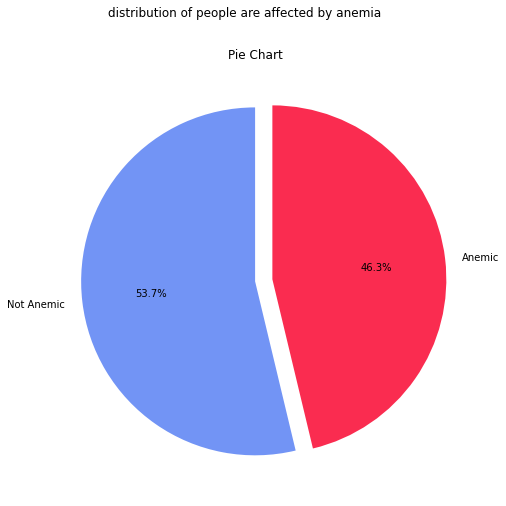

<Figure size 432x288 with 0 Axes>

In [ ]:
# set canvas
plt.figure(figsize=(12,8))

# visualize pie plot
df['Result'].value_counts().plot.pie(explode=[0, 0.1], 
                                     autopct='%1.1f%%', 
                                     colors=['#7294f5','#fa2c50'], 
                                     startangle = 90, 
                                     shadow=False)
plt.title('Pie Chart')
plt.ylabel('')

plt.suptitle('distribution of people are affected by anemia')
# plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()
plt.savefig('foo.png')

Dalam visualiasi histogram ini, dapat dilihat bahwa pengidap anemia lebih sedikit daripada orang yang tidak mengidap anemia yaitu sebesar 46.3% yang dapat dilihat pada pie chart. 

Coorelation Hemoglobin

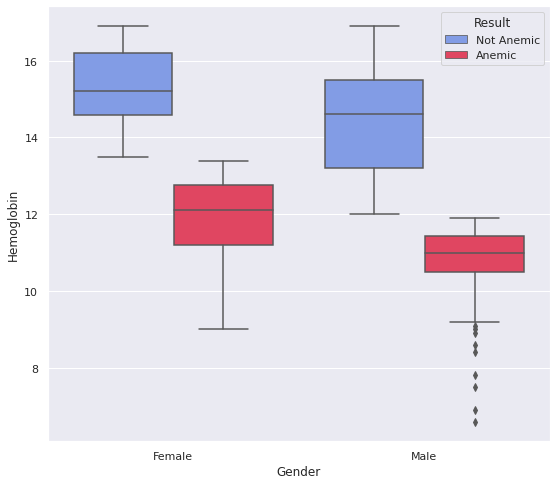

In [ ]:
sns.set(rc = {'figure.figsize':(9,8)})
sns.boxplot(x='Gender',y='Hemoglobin', hue='Result', palette={"Not Anemic": "#7294f5", "Anemic": "#fa2c50"}, data=df)

Pada visualisasi diatas, Orang yang terkena anemia, cenderung memiliki kadar hemoglobin yang rendah

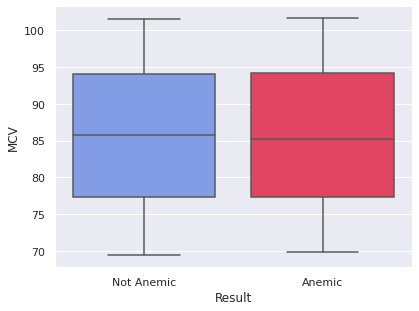

In [ ]:
sns.set(rc = {'figure.figsize':(6.4,4.8)})
sns.boxplot(y='MCV', x='Result', palette={"Not Anemic": "#7294f5", "Anemic": "#fa2c50"}, data=df)

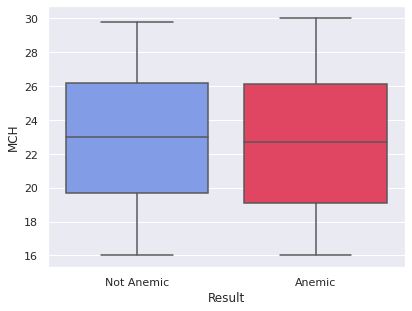

In [ ]:
sns.set(rc = {'figure.figsize':(6.4,4.8)})
sns.boxplot(y='MCH', x='Result', palette={"Not Anemic": "#7294f5", "Anemic": "#fa2c50"}, data=df)

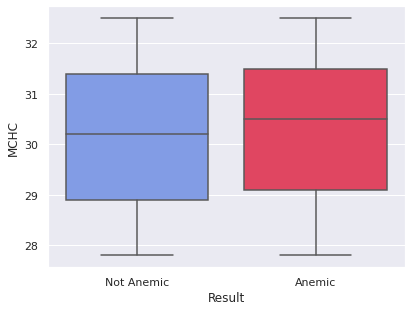

In [ ]:
sns.set(rc = {'figure.figsize':(6.4,4.8)})
sns.boxplot(y='MCHC', x='Result', palette={"Not Anemic": "#7294f5", "Anemic": "#fa2c50"}, data=df)

dari tiga visualiasi terakhir diatas, tidak ada perbedaan yang secara signifikan dapat ditemukan.

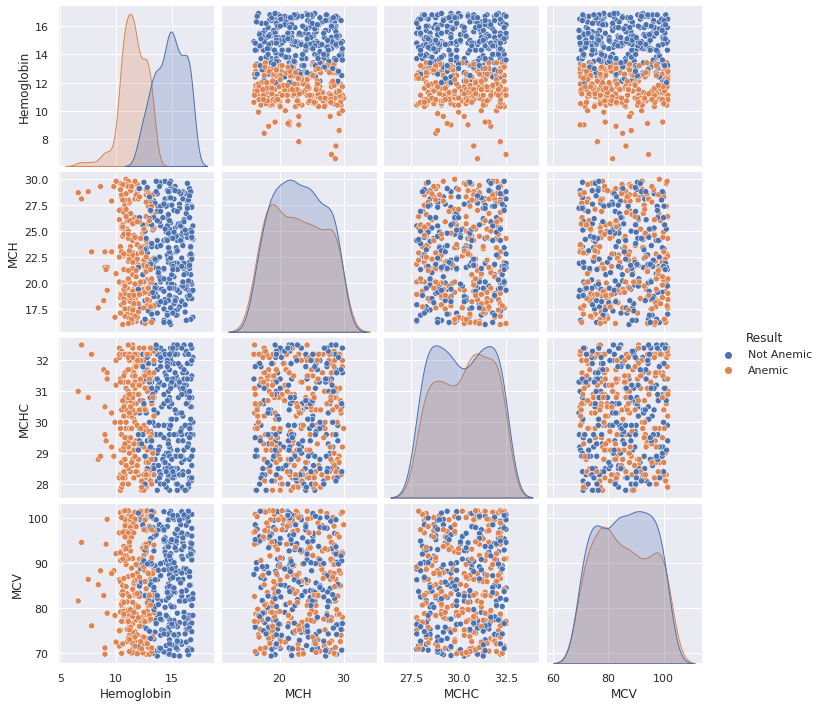

In [ ]:
# pairplot
sns.pairplot(df, hue="Result")

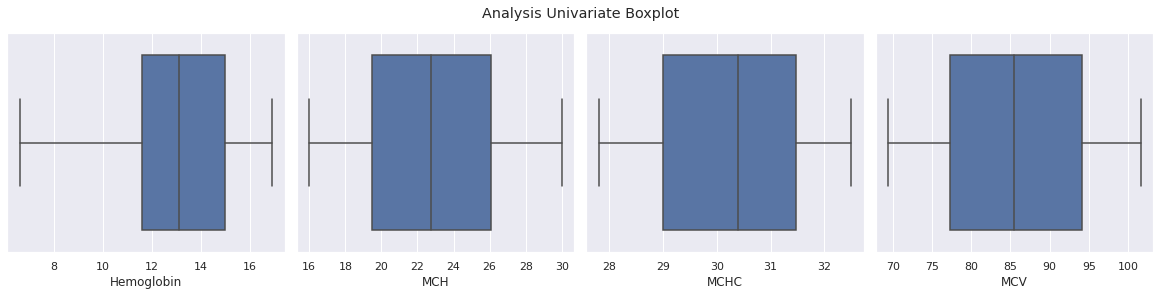

In [ ]:
# boxplot
sns.set_theme()
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 4), constrained_layout=True)
plt.suptitle("Analysis Univariate Boxplot")
ax = ax.flatten()
colbox = df.iloc[:, 1:5]
for i, j in enumerate(colbox):
    sns.boxplot(x=df[j], ax=ax[i])

tidak ada outlier pada dataset.

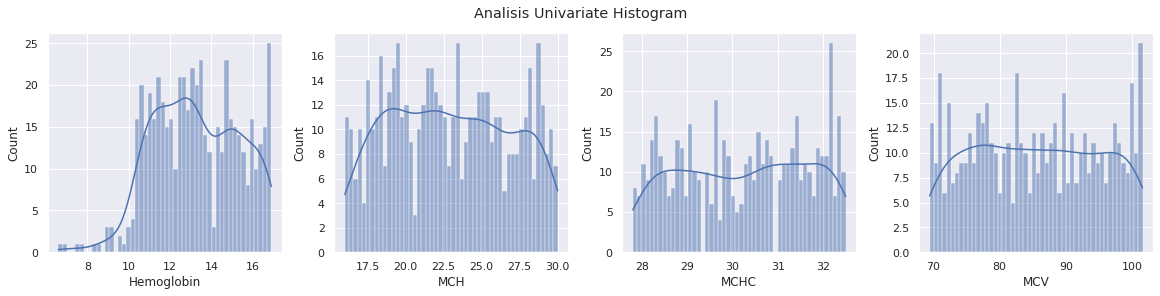

In [ ]:
# histplot
fig, ax = plt.subplots(nrows=1,ncols=4, figsize=(16,4), constrained_layout=True)
plt.suptitle("Analisis Univariate Histogram")
ax=ax.flatten()
colhist = df.iloc[:, 1:5]
for i, j in enumerate(colhist):
    sns.histplot(df[j], ax=ax[i], kde=True, bins=50)

Distribusi data normal pada MCH, MCHC, dan MCV. sedangkan pada Hemoglobin miring ke kiri (left-skewed).

## **C. Data Preparation**

Data preparation diperlukan dalam proses pengembangan model machine learning. dimana nantinya akan dilakukan proses transformasi data sehingga proses pemodelan dapat berjalan secara optimal.

### **Inverse to numerical (Encode)**

In [ ]:
# inverse to numerical
def inverse_categorization(data):
  df.replace(to_replace={'Gender': {'Male':0, 'Female':1},
                         'Result': {'Not Anemic':0, 'Anemic':1}}, inplace=True)
  df.astype({'Gender': 'int64'}, {'Result': 'int64'})
  return df

In [ ]:
# apply to datasets
inverse_categorization(df)

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
946,0,11.8,21.2,28.4,98.1,1
1156,1,15.1,21.3,32.4,100.6,0
1160,1,14.8,19.5,32.2,72.1,0
1376,1,13.2,20.4,28.0,97.4,1


### **Train-Test Split**

Disini dataset akan dibagi menjadi data train dan test, sebelum membuat model. data train digunakan untuk mengembangkan model. sedangkan, data test diperlukan untuk menguji seberapa baik generalisasi model terhadap data baru. pada case ini, dataset akan dibagi dengan proporsi 20% yang akan digunakan sebagai data test. variabel X merupakan variabel untuk menampung attribut dan variabel y untuk menampung nilai class. 

In [ ]:
# define x and y
X = df.drop('Result', axis=1).values
Y = df['Result'].values

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

print('X_train: {} records data'.format(len(X_train)))
print('y_train: {} records data'.format(len(y_train)))
print('X_test: {} records data'.format(len(X_test)))
print('y_test: {} records data'.format(len(y_test)))

X_train: 427 records data
y_train: 427 records data
X_test: 107 records data
y_test: 107 records data


Setelah melakukan splitting data, didapatkan 427 data yang akan digunakan sebagai data train (80%) dan 107 data sebagai data testing (20%).

Tahap selanjutnya adalah melakukan scaling data, dimana pada tahap ini bertujuan untuk menyeragamkan data agar sesuai dengan skala yang diinginkan. scaler yang digunakan adalah StandardScaler. 

### **Scaling Data**

In [ ]:
# feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# check scale data
X_train

array([[-1.03576809, -0.75835995, -0.78250735, -0.97752786, -1.45579792],
       [ 0.96546709,  0.91500333,  1.52027121, -1.47511484,  0.47836596],
       [ 0.96546709, -0.56711844,  1.3431344 ,  0.08872996,  0.13520785],
       ...,
       [ 0.96546709, -1.28427413, -0.0739601 , -0.83536015, -0.19755153],
       [ 0.96546709, -1.18865337, -0.80781261,  0.37306538,  1.45584663],
       [ 0.96546709, -1.37989489, -1.4910546 ,  0.79956851,  0.51996088]])

### **Imbalanced Classes**

Imbalance class merupakan kondisi dimana distribusi pada setiap label tidak seimbang. Hal ini, sangat umum ditemui dalam masalah pemodelan prediksi klasifikasi. perlu dilakukan penanganan terkait adanya kelas yang tidak seimbang. disini akan coba dilakukan handling menggunakan teknik oversampling meggunakan Synthetic Minority Oversampling Technique (SMOTE) adalah teknik statistik untuk meningkatkan data minoritas agar seimbang.

Text(0.5, 1.0, 'Perbandingan Class (Before)')

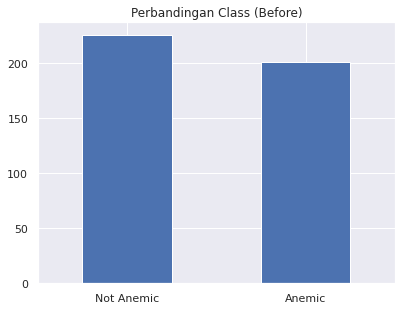

In [ ]:
# imbalanced class
df_y_train = pd.DataFrame(y_train)
df_y_train.value_counts().plot(kind='bar')
plt.xticks([0,1],['Not Anemic','Anemic'], rotation=0)
plt.xlabel('')
plt.title('Perbandingan Class (Before)')

In [ ]:

# smote oversampling
smote = SMOTE(sampling_strategy = 1)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Perbandingan Class (After)')

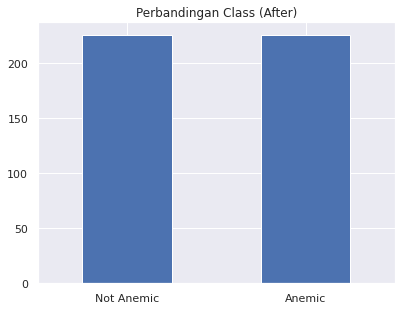

In [ ]:
# check class
df_y_smote = pd.DataFrame(y_smote)
df_y_smote.value_counts().plot(kind='bar')
plt.xticks([0,1],['Not Anemic','Anemic'], rotation=0)
plt.xlabel('')
plt.title('Perbandingan Class (After)')

Data sudah siap untuk digunakan untuk modelling.

## **D. Predictive Modelling**

In [ ]:
# object model
modelKNN = KNeighborsClassifier(n_neighbors=8, metric='minkowski')
modelSVM = SVC(kernel='rbf')
modelRF = RandomForestClassifier(n_estimators=100)

# fitting
modelKNN.fit(X_smote, y_smote)
modelSVM.fit(X_smote, y_smote)
modelRF.fit(X_smote, y_smote)

# predict
y_predKNN = modelKNN.predict(X_test)
y_predSVM = modelSVM.predict(X_test)
y_predRF = modelRF.predict(X_test)

## **E. Evaluation**

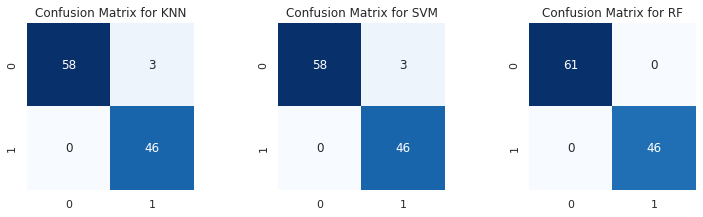

In [ ]:
# conf-matrix
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(12,8))

conf_mat = confusion_matrix(y_test, y_predKNN)
sns.heatmap(conf_mat, ax=ax[0], square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
ax[0].set_title('Confusion Matrix for KNN')

conf_mat = confusion_matrix(y_test, y_predSVM)
sns.heatmap(conf_mat, ax=ax[1], square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
ax[1].set_title('Confusion Matrix for SVM')

conf_mat = confusion_matrix(y_test, y_predRF)
sns.heatmap(conf_mat, ax=ax[2], square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
ax[2].set_title('Confusion Matrix for RF')

plt.subplots_adjust(wspace=0.5)
plt.show()

In [ ]:
# acc_score
acc_score = pd.DataFrame(columns=['train', 'test'], index=['KNN','SVM','RF'])
model_dict = {'KNN': modelKNN, 'SVM': modelSVM, 'RF' : modelRF}
for name, model in model_dict.items():
    acc_score.loc[name, 'train'] = model.score(X_smote, y_smote)
    acc_score.loc[name, 'test'] = model.score(X_test, y_test)

acc_score

,train,test
KNN,0.975664,0.971963
SVM,0.984513,0.971963
RF,1.0,1.0


In [ ]:

print(classification_report(y_test,y_predKNN))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        61
           1       0.94      1.00      0.97        46

    accuracy                           0.97       107
   macro avg       0.97      0.98      0.97       107
weighted avg       0.97      0.97      0.97       107



In [ ]:
# svm report
print(classification_report(y_test,y_predSVM))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        61
           1       0.94      1.00      0.97        46

    accuracy                           0.97       107
   macro avg       0.97      0.98      0.97       107
weighted avg       0.97      0.97      0.97       107



In [ ]:
# random-forest report
print(classification_report(y_test,y_predRF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        46

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107



In [ ]:
# report in dataframe
report_RF = classification_report(y_test,y_predRF, output_dict=True)
df_report = pd.DataFrame(report_RF).transpose()
df_report

,precision,recall,f1-score,support
0,1.0,1.0,1.0,61.0
1,1.0,1.0,1.0,46.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,107.0
weighted avg,1.0,1.0,1.0,107.0


Dari hasil diatas, model Random Forest merupakan model terbaik yang dikembangkan dengan nilai recall sebesar 100% yang bisa digunakan sebagai predictive modelling.

# **Penilaian Submission**

## **Kriteria Submission**
- Project merupakan hasil pekerjaan sendiri. **(done)**
- Project belum pernah digunakan untuk submission kelas Machine Learning di Dicoding dan belum pernah dipublikasikan di platform manapun. **(done)**
- Dataset yang dipakai merupakan data kuantitatif (minimum 500 sampel data). **(done)**
- Memberikan dokumentasi menggunakan text cell pada notebook (.ipynb) untuk menjelaskan setiap tahapan proyek. **(done)**
- Menentukan solusi permasalahan menggunakan pendekatan machine learning atau deep learning dengan memilih salah satu dari penyelesaian berikut: Klasifikasi, Regresi, Clustering, Time series dan forecasting. **(done, i use classification)**
- Membuat draf laporan proyek machine learning yang menjelaskan alur proyek Anda dari mulai pemilihan domain permasalahan (problem domain), data understanding, data preparation, modeling, hingga tahap evaluasi. Ketentuan draf laporan proyek machine learning dapat Anda lihat pada sub modul berikutnya tentang Detail Laporan. **(done)**

## **Saran Submission**
Menerapkan Rubrik/Kriteria Penilaian (Tambahan) untuk mendapatkan skala penilaian (bintang) yang lebih tinggi. **(done)**

## **Detail penilaian submission:**
Submission Anda akan dinilai oleh reviewer dengan skala 1-5 berdasarkan parameter berikut. 

- Bintang 1: Semua ketentuan terpenuhi, tetapi terdapat indikasi plagiat dengan menggunakan proyek orang lain dan hanya mengubah kontennya saja.
- Bintang 2: Semua ketentuan terpenuhi, tetapi penulisan kode dan laporan berantakan.
- Bintang 3: Semua ketentuan terpenuhi, penulisan kode, dan laporan cukup baik.
- Bintang 4: Semua ketentuan terpenuhi, menerapkan minimal tiga (3) kriteria Rubrik Penilaian Tambahan pada laporan.
- Bintang 5: Semua ketentuan terpenuhi, menerapkan minimal seluruh kriteria (6) Rubrik Penilaian Tambahan pada laporan. **(done)**

## **Ketentuan Berkas Submission**
Mengirimkan Submission dalam bentuk .zip yang terdiri dari 3 (tiga) berkas file, yaitu:  
- File Jupyter Notebook (.ipynb). Pastikan file jupyter notebook sudah dijalankan ya. **(done)**
- File Python (.py) **(done)**
- File laporan dalam bentuk Markdown (.md) atau Text (.txt) **(done)**